<b>Team 10: The Ogres</b>

Chih-Yu Kuo (Chewy)

Greta Tengattini

Gustavo Giopato

Martha del Río

# Model Introduction

In our project, the objective was to develop a predictive model that could forecast the number of clicks based on various features, focusing on a regression task where the output was a continuous variable indicating click counts.

We utilized Decision Tree Regression as our primary modeling approach due to its simplicity, interpretability, and ability to capture nonlinear relationships in the data. Decision trees work by progressively splitting the feature space into smaller regions, making predictions based on the average target value within each region.

Our model, named "Decision Tree Regression," was trained on a dataset comprising both numerical and categorical features. We employed hyperparameter tuning to enhance its performance and mitigate overfitting.

Finally, we evaluated our model's effectiveness through metrics such as Root Mean Squared Error (RMSE) and R-squared, providing insights into its predictive capabilities and generalization performance.

# Package and Dataset Imports

In [7]:
## Importing Libraries ##
import numpy as np                                                             # For numerical operations and working with arrays.
import pandas as pd                                                            # Essential for data manipulation and analysis, working with structured data.
import matplotlib.pyplot as plt                                                # For creating static, interactive, and animated visualizations in Python.
import seaborn as sns                                                          # Based on matplotlib, provides a high-level interface for drawing attractive statistical graphics.
from sklearn.preprocessing import LabelEncoder                                 # Tool to convert categorical text data into model-understandable numerical data.
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor  # Linear models for regression tasks.
from sklearn.preprocessing import StandardScaler                               # StandardScaler for standardizing features by removing the mean and scaling to unit variance.
from sklearn.tree import DecisionTreeRegressor, plot_tree                      # For decision tree models and plotting tree structures.
from sklearn.model_selection import RandomizedSearchCV                         # Efficient parameter tuning using random searches.
from sklearn.model_selection import train_test_split                           # For splitting data arrays into two subsets: for training data and for testing data.
from sklearn.metrics import mean_squared_error                                 # Import the mean_squared_error function to evaluate the performance of regression models by calculating the average squared difference between the actual and predicted values.
from scipy.stats import uniform                                                # Import the uniform continuous random variable from scipy.stats. It is often used in hyperparameter tuning (e.g., for specifying a range for continuous parameters during randomized search).
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Import RandomForestRegressor and GradientBoostingRegressor from sklearn. These are ensemble learning methods for regression tasks. RandomForestRegressor fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. GradientBoostingRegressor builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.
from sklearn.svm import SVR                                                    # Import SVR (Support Vector Regression) from sklearn. It is a type of Support Vector Machine (SVM) that supports linear and non-linear regression. The goal of the SVR algorithm is to find a function that has at most ε deviation from the actually obtained targets for all the training data, and at the same time is as flat as possible.
from math import sqrt                                                          # Import sqrt to calculate the square root. This is often used in the context of model evaluation, for instance, to calculate the root mean square error (RMSE) from the mean squared error (MSE).


In [8]:
# Checking Data Files for Further Inspection
# Loading Training Data 
file1 = 'train.csv'                          # Path to the training data file.
df_train = pd.read_csv(file1, header=0)      # Reads the training data into a pandas DataFrame. 
                                             # 'header=0' indicates that the first line of the file contains column names.

# Loading Testing Data
file2 = 'test.csv'                           # Path to the testing data file.
df_test = pd.read_csv(file2, header=0)       # Reads the testing data into a pandas DataFrame.
                                             # Similarly, 'header=0' assumes the first line contains column names.

# Setting pandas Print Options (Optional but Recommended for Better Data Inspection)
pd.set_option('display.max_rows', 500)       # Sets the maximum number of rows pandas will display when printing a DataFrame to 500.
                                             # Useful for inspecting larger datasets without truncation.
pd.set_option('display.max_columns', 500)    # Sets the maximum number of columns pandas will display to 500.
                                             # Helps with viewing wide DataFrames without column truncation.
pd.set_option('display.width', 1000)         # Sets the width of the display in characters to 1000.
                                             # This can improve readability by preventing line wrapping within the display of pandas objects.
 

In [9]:
# Concatenating Datasets Together for Missing Value Analysis and Feature Engineering
df_train['set'] = 'Not Kaggle'                # Adds a new column 'set' to the training dataset and fills it with 'Not Kaggle'.
                                              # This marks all rows originating from the training set for easy identification later.

df_test['set'] = 'Kaggle'                     # Similarly, adds a 'set' column to the testing dataset, but marks these rows as 'Kaggle'.
                                              # This differentiates rows originating from the test set.

# Concatenating Both Datasets Together for Further Analysis and Feature Engineering
df_full = pd.concat(objs=[df_train, df_test], # List of DataFrames to concatenate. Here, combining training and test sets.
                    axis=0,                   # Axis to concatenate along. '0' means row-wise concatenation,
                                              # effectively stacking one DataFrame on top of the other.
                    ignore_index=False)       # If False, the original row indices from each DataFrame are preserved. 
                                              # If True, a new integer index would be created for the concatenated DataFrame.

# Checking Data
df_full.head(n=5)  # Displays the first 5 rows of the concatenated DataFrame.
                   # This is a quick check to ensure the concatenation worked as expected and to preview the combined data.


,entry_id,Publisher Name,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Status,Search Engine Bid,Impressions,Avg. Pos.,Avg. Cost per Click,Clicks,set
0,mkt_001,Google - Global,fly to nice,Broad,Air France Global Campaign,Nice,nice,Position 1- 3,Unavailable,$1.25,380,1.85,$0.95,15,Not Kaggle
1,mkt_002,Yahoo - US,munich airport,Advanced,Western Europe Destinations,Munich,uncategorized,NaN,Paused,$6.25,25,1.84,$5.71,1,Not Kaggle
2,mkt_003,Overture - Global,chicago to paris,Advanced,Unassigned,Unassigned,paris,Position 1-2 Target,Sent,$0.45,"2,315",4.48,$0.43,14,Not Kaggle
3,mkt_005,Yahoo - US,discount international airfare,Advanced,Geo Targeted Los Angeles,Discount International Los Angeles,uncategorized,NaN,Paused,$6.25,86,1.42,$2.45,9,Not Kaggle
4,mkt_006,Google - US,cont:google_yearlong 2006::google|marrakech,NaN,Google_Yearlong 2006,Google|marrakech,uncategorized,NaN,Unavailable,$7.50,19,1.53,$4.63,1,Not Kaggle


# Exploratory Data Analysis and Data Preprocessing


In [10]:
# Displaying the size of the train dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {df_train.shape[0]} 

Features (columns) : {df_train.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 4410 

Features (columns) : 15



In [11]:
# Displaying the size of the test dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {df_test.shape[0]} 

Features (columns) : {df_test.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 100 

Features (columns) : 14



In [12]:
# Display the first five rows of the Dataframe
df_train.head()

,entry_id,Publisher Name,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Status,Search Engine Bid,Impressions,Avg. Pos.,Avg. Cost per Click,Clicks,set
0,mkt_001,Google - Global,fly to nice,Broad,Air France Global Campaign,Nice,nice,Position 1- 3,Unavailable,$1.25,380,1.85,$0.95,15,Not Kaggle
1,mkt_002,Yahoo - US,munich airport,Advanced,Western Europe Destinations,Munich,uncategorized,NaN,Paused,$6.25,25,1.84,$5.71,1,Not Kaggle
2,mkt_003,Overture - Global,chicago to paris,Advanced,Unassigned,Unassigned,paris,Position 1-2 Target,Sent,$0.45,"2,315",4.48,$0.43,14,Not Kaggle
3,mkt_005,Yahoo - US,discount international airfare,Advanced,Geo Targeted Los Angeles,Discount International Los Angeles,uncategorized,NaN,Paused,$6.25,86,1.42,$2.45,9,Not Kaggle
4,mkt_006,Google - US,cont:google_yearlong 2006::google|marrakech,NaN,Google_Yearlong 2006,Google|marrakech,uncategorized,NaN,Unavailable,$7.50,19,1.53,$4.63,1,Not Kaggle


In [13]:
# Using .describe() to get the descriptive statistics for numeric data in the DataFrame
clicks_stats = df_train.describe(include = 'number').round(decimals = 2)

# Checking the results of the descriptive statistics
clicks_stats

,Avg. Pos.
count,4410.00
mean,1.93
std,1.08
min,0.00
25%,1.14
50%,1.59
75%,2.31
max,15.00


In [14]:
#determining the 'y' variable of the dataset
y_variable = 'Clicks'

In [15]:
# showing the columns in the Kaggle dataset
df_full.columns

Index(['entry_id', 'Publisher Name', 'Keyword', 'Match Type', 'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Status', 'Search Engine Bid', 'Impressions', 'Avg. Pos.', 'Avg. Cost per Click', 'Clicks', 'set'], dtype='object')

## Data Processing

In [16]:
# Data Preprocessing: Cleaning and Formatting

# Replacing " - " with "_" in 'Publisher Name'
# This can standardize the naming convention, making it easier to match or query.
df_full['Publisher Name'] = df_full['Publisher Name'].str.replace(" - ", "_")

# Removing "$" and "," from 'Search Engine Bid'
# These characters are removed to prepare the data for conversion to a numerical type,
# as the presence of such characters would prevent operations that require numeric values.
df_full['Search Engine Bid'] = df_full['Search Engine Bid'].str.replace("$", "").str.replace(",", "")

# Removing "," from 'Clicks', to convert the data to numeric types.
df_full['Clicks'] = df_full['Clicks'].str.replace(",", "")

# Removing "$" and "," from 'Avg. Cost per Click'
# Similar to 'Search Engine Bid', this cleaning ensures the column can be treated as numeric for calculations.
df_full['Avg. Cost per Click'] = df_full['Avg. Cost per Click'].str.replace("$", "").str.replace(",", "")

# Removing "," from 'Impressions'
# As with 'Clicks', removing commas is necessary for numeric conversion.
df_full['Impressions'] = df_full['Impressions'].str.replace(",", "")


In [17]:
# Showing the info
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4510 entries, 0 to 99
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entry_id             4510 non-null   object 
 1   Publisher Name       4510 non-null   object 
 2   Keyword              4510 non-null   object 
 3   Match Type           4462 non-null   object 
 4   Campaign             4510 non-null   object 
 5   Keyword Group        4510 non-null   object 
 6   Category             4510 non-null   object 
 7   Bid Strategy         3286 non-null   object 
 8   Status               4510 non-null   object 
 9   Search Engine Bid    4510 non-null   object 
 10  Impressions          4510 non-null   object 
 11  Avg. Pos.            4510 non-null   float64
 12  Avg. Cost per Click  4510 non-null   object 
 13  Clicks               4410 non-null   object 
 14  set                  4510 non-null   object 
dtypes: float64(1), object(14)
memory usage: 563.8

In [18]:
# Converting Columns to Numeric Data Types

# 'Search Engine Bid' conversion
# Converts the 'Search Engine Bid' column to a numeric type, facilitating numerical operations and analysis.
df_full['Search Engine Bid'] = pd.to_numeric(df_full['Search Engine Bid'])

# 'Clicks' conversion
# Converts the 'Clicks' column to a numeric type, necessary for any sort of quantitative analysis or modeling that involves this variable.
df_full['Clicks'] = pd.to_numeric(df_full['Clicks'])

# 'Avg. Cost per Click' conversion
# Converts the 'Avg. Cost per Click' column to a numeric type. This step is crucial for calculations involving advertising costs.
df_full['Avg. Cost per Click'] = pd.to_numeric(df_full['Avg. Cost per Click'])

# 'Impressions' conversion
# Converts the 'Impressions' column to numeric, enabling quantitative evaluations of ad views or exposures.
df_full['Impressions'] = pd.to_numeric(df_full['Impressions'])

# 'Avg. Pos.' conversion
# Converts the 'Avg. Pos.' (Average Position) column to a numeric type. This is particularly important for analyses involving the positioning of ads in search results or other listings.
df_full['Avg. Pos.'] = pd.to_numeric(df_full['Avg. Pos.'])


In [19]:
# Making Categorical Columns Numeric

# Label encoding 'Publisher Name'
# Initializes a LabelEncoder for the 'Publisher Name' column, converting unique string labels into integers.
PublisherNameEncoder = LabelEncoder()
df_full['Publisher Name Num.'] = PublisherNameEncoder.fit_transform(df_full['Publisher Name'])
# This process assigns a unique integer to each unique 'Publisher Name', facilitating the use of this categorical variable in modeling.

# Label encoding 'Match Type'
# Similarly, the 'Match Type' column is encoded, converting categorical data into a numeric format for model compatibility.
MatchTypeEncoder  = LabelEncoder()
df_full['Match Type Num.'] = MatchTypeEncoder.fit_transform(df_full['Match Type'])

# Label encoding 'Bid Strategy'
# Applies label encoding to the 'Bid Strategy' column, allowing the inclusion of this information in numerical models.
BidStrategyEncoder  = LabelEncoder()
df_full['Bid Strategy Num.'] = BidStrategyEncoder.fit_transform(df_full['Bid Strategy'])

# Label encoding 'Status'
# The 'Status' column undergoes label encoding, transforming categorical statuses into a numeric form.
StatusEncoder  = LabelEncoder()
df_full['Status Num.'] = StatusEncoder.fit_transform(df_full['Status'])

# Label encoding 'Campaign'
# Finally, 'Campaign' names or identifiers are encoded, converting potentially complex strings into simple numeric identifiers.
CampaignEncoder  = LabelEncoder()
df_full['Campaign Num.'] = CampaignEncoder.fit_transform(df_full['Campaign'])


In [20]:
# showing the missing values in the full database
print(df_full.isnull().sum(axis = 0))

entry_id                  0
Publisher Name            0
Keyword                   0
Match Type               48
Campaign                  0
Keyword Group             0
Category                  0
Bid Strategy           1224
Status                    0
Search Engine Bid         0
Impressions               0
Avg. Pos.                 0
Avg. Cost per Click       0
Clicks                  100
set                       0
Publisher Name Num.       0
Match Type Num.           0
Bid Strategy Num.         0
Status Num.               0
Campaign Num.             0
dtype: int64


In [21]:
# Identifying Missing Values Across All Columns
# The .isna().sum() method chain is used to count the number of NA (missing) values in each column of the DataFrame.
df_full.isna().sum()

# Replacing Missing Values in Specific Columns

# For the 'Bid Strategy' column:
# Uses np.where to check each row in the 'Bid Strategy' column.
# If a value is missing (NA), it is replaced with 'No Bid Strategy'; otherwise, the original value is retained.
df_full['Bid Strategy'] = np.where(df_full['Bid Strategy'].isna(), 'No Bid Strategy', df_full['Bid Strategy'])

# For the 'Match Type' column:
# First, a list comprehension is used to replace 'N/A' strings with 'No Match Type'.
df_full['Match Type'] = ['No Match Type' if x == 'N/A' else x for x in df_full['Match Type']]
# Then, np.where is used similarly to the 'Bid Strategy' case, replacing NA values with 'No Match Type'.
df_full['Match Type'] = np.where(df_full['Match Type'].isna(), 'No Match Type', df_full['Match Type'])

# Checking Results After Replacing Missing Values
# Re-runs the .isna().sum() method chain to count NA values after the replacements.
# This step is important to ensure that the intended replacements were applied successfully across the DataFrame.
df_full.isna().sum()


entry_id                 0
Publisher Name           0
Keyword                  0
Match Type               0
Campaign                 0
Keyword Group            0
Category                 0
Bid Strategy             0
Status                   0
Search Engine Bid        0
Impressions              0
Avg. Pos.                0
Avg. Cost per Click      0
Clicks                 100
set                      0
Publisher Name Num.      0
Match Type Num.          0
Bid Strategy Num.        0
Status Num.              0
Campaign Num.            0
dtype: int64

In [22]:
# Identifying and Developing a Correlation Matrix for Numeric Columns

# Selecting only numeric columns from the DataFrame.
numeric_cols = df_full.select_dtypes(include=['number']).columns

# Calculating the correlation matrix using Pearson's method.
data_corr_numeric = df_full[numeric_cols].corr(method='pearson')

# Filtering Results to Show Correlations with 'Clicks'
# This focuses on understanding how different numeric features correlate with 'Clicks'.
rentals_corr_numeric = data_corr_numeric.loc[:, 'Clicks'].round(decimals=2).sort_values(ascending=False)  # rounded to two decimal places for readability and sorted in descending order.

# Displaying the correlation values of 'Clicks' with other numeric features.
# This analysis can guide feature selection for predictive modeling or insights into factors affecting 'Clicks'.
rentals_corr_numeric


Clicks                 1.00
Impressions            0.40
Search Engine Bid      0.13
Match Type Num.        0.02
Bid Strategy Num.      0.01
Publisher Name Num.    0.00
Status Num.           -0.01
Avg. Pos.             -0.02
Avg. Cost per Click   -0.03
Campaign Num.         -0.05
Name: Clicks, dtype: float64

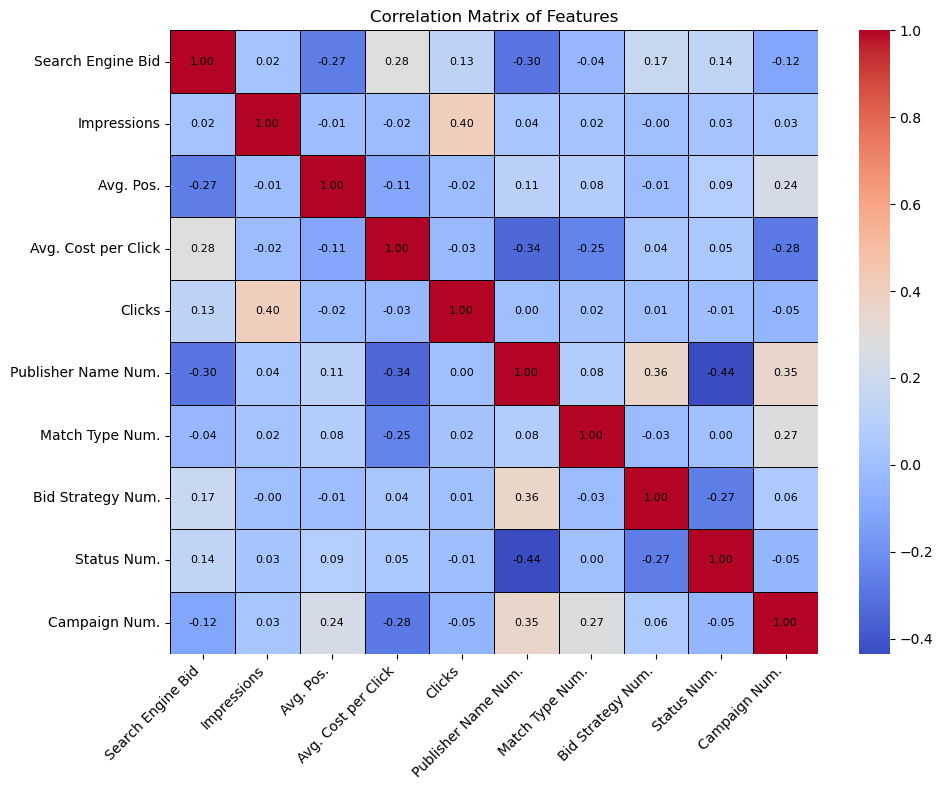

In [23]:
# Visualizing the Correlation Matrix with a Heatmap

# Set the figure size for the heatmap.
plt.figure(figsize=(10, 8))  # Specifies the width and height of the figure in inches.

# Creating the heatmap using seaborn's heatmap function.
sns.heatmap(data_corr_numeric,  # The correlation matrix calculated earlier.
            cmap='coolwarm',   
            annot=True,        
            linecolor='black',
            linewidths=0.5,    
            fmt=".2f",        
            cbar=True,         
            annot_kws={"size": 8, "color": 'black'})  
# Adding a title to the heatmap.
plt.title('Correlation Matrix of Features', fontsize=12)  # Title of the heatmap and its font size.

# Customizing the ticks on the x and y axes for better readability.
plt.xticks(fontsize=10, rotation=45, ha='right')  # Adjusts the x-axis labels with a 45-degree rotation and aligns them to the right.
plt.yticks(fontsize=10)  # Adjusts the y-axis labels font size.

# Adjusting the layout to make sure everything fits within the figure area without any clipping.
plt.tight_layout()

# Displaying the heatmap.
plt.show()  # Renders the heatmap on the screen. This is the final step to visualize the correlation matrix.


- First Visualization (Correlation Matrix of Features)

The visualization displayed the Pearson correlation coefficients between different features of our dataset, each ranging from -1 to 1. This visualization was pivotal for us as it aided in feature selection by identifying multicollinearity, steering us to select features that provided unique information without redundancy. Comprehending these relationships was instrumental in honing our model by concentrating on the most significant variables.

Search Engine Bid: This feature had a notably high positive correlation with 'Avg. Cost per Click', which was expected since higher bids typically led to higher costs per click. However, its correlation with 'Clicks' was relatively low, suggesting that merely increasing the bid might not necessarily result in a proportional increase in clicks.

Impressions: Impressions showed a moderate positive correlation with 'Clicks'. This implied that as the number of impressions increased, the number of clicks tended to increase as well, which was in line with the intuitive notion that more visibility could lead to more clicks.

Avg. Pos. (Average Position): It was negatively correlated with 'Search Engine Bid' and 'Avg. Cost per Click', indicating that higher bids might assist in securing a better (lower numerically) ad position. A better ad position was generally coveted as it was believed to result in more clicks and conversions.

Avg. Cost per Click: This metric demonstrated a strong positive correlation with 'Search Engine Bid', reinforcing the notion that bidding more for keywords or ad placement directly impacted the cost incurred per click.

Clicks: Clicks had a modest correlation with 'Impressions', indicating that an increase in impressions could lead to an increase in clicks. Nevertheless, the lack of a strong correlation with 'Search Engine Bid' implied that increasing bids wasn't the only factor in garnering more clicks.

Publisher Name Num: This revealed a fair positive correlation with 'Match Type Num.' and 'Bid Strategy Num.', which might indicate that certain publishers were associated with specific match types and bid strategies. This information was valuable for us to tailor bids and match types to specific publishers to optimize campaign performance.

Match Type Num.: There was a negligible correlation with most other features, which indicated that the match type used might not directly influence other aspects such as the number of clicks or the average position. This suggested that the match type was an independent aspect of the campaigns.

Bid Strategy Num.: The correlation with 'Publisher Name Num.' suggested some dependency, which could indicate that specific bid strategies were preferred or more effective with certain publishers.

Status Num. and Campaign Num.: These features showed little to no correlation with other features, suggesting they were independent attributes of the data. Their low correlation with clicks could imply that they didn't directly impact the success of the ads in terms of clicks.







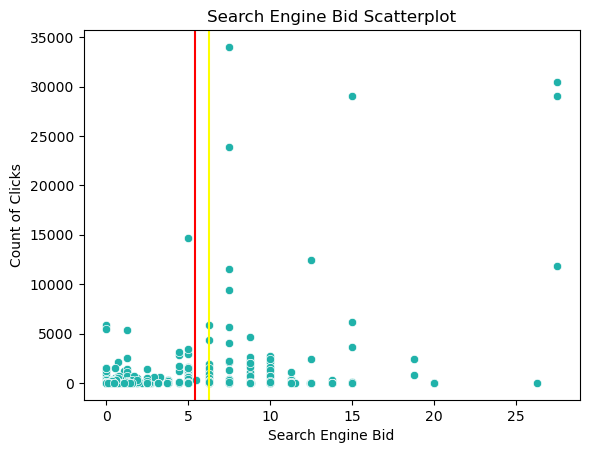

In [24]:
# Second Visualization

# Plotting the relationship between 'Search Engine Bid' and 'Clicks' to understand how bid amount affects click count.
# A scatterplot is used for this visualization, which is a great way to see individual data points and detect any patterns, trends, or correlations.
sns.scatterplot(x     = df_full['Search Engine Bid'], 
                y     = df_full['Clicks'],
                data  = df_full,
                color = 'lightseagreen')  # The color 'lightseagreen' is chosen for all dots for aesthetic consistency.

# Adding a descriptive title to the scatter plot to inform viewers of the content.
# The 'plt.title' function is used here to set the title of the plot.
plt.title(label = 'Search Engine Bid Scatterplot')

# Labeling the x-axis to indicate that it represents different values of 'Search Engine Bid'.
# 'plt.xlabel' function sets the label for the x-axis.
plt.xlabel(xlabel = 'Search Engine Bid')

# Labeling the y-axis to show it represents the 'Count of Clicks' corresponding to each bid value.
# 'plt.ylabel' function sets the label for the y-axis.
plt.ylabel(ylabel = 'Count of Clicks')

# Adding vertical lines to mark the mean and median 'Search Engine Bid' values on the plot.
# 'plt.axvline' draws a line at a specific position along the x-axis.
# This visual aid helps in quickly identifying the central tendency of bid values.
plt.axvline(df_full['Search Engine Bid'].mean(), color = "red")  # Red line for mean
plt.axvline(df_full['Search Engine Bid'].median(), color = "yellow")  # Yellow line for median

# Finally, displaying the plot with 'plt.show()'. This function ensures that the plot is rendered and shown in the output.
plt.show()


- Second Visualization "Search Engine Bid":

In the second visualizations, the scatterplot titled "Search Engine Bid Scatterplot," we analyze the connection between the search engine bids and the count of clicks these bids achieved. The axis, 'Search Engine Bid' indicate the bid amount for keywords or ad placements in search engine marketing. The y-axis, 'Count of Clicks,' measures the effectiveness of each strategy in terms of clicks received. Despite the increase in bid value along the x-axis, there is no apparent consistent rise in the number of clicks. Most of the click counts are clustered at the lower end of the bid scale, indicating that higher bids do not necessarily translate to a proportionally higher number of clicks. There are a few higher clicks counts scattered across various bid amounts, but these do not show a discernible pattern and are relatively sparse. The mean and median lines, colored red and yellow, appear close together near the lower bid values, suggesting that the average and median number of clicks are more associated with lower bid values rather than the higher ones.

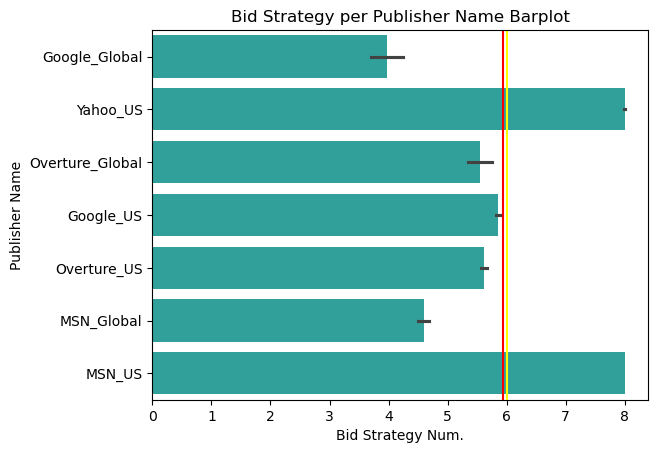

In [25]:
# Third visualization

# Intended to plot 'Bid Strategy Num.' for each 'Publisher Name', but the approach is unconventional.
sns.barplot(x     = df_full['Bid Strategy Num.'], 
            y     = df_full['Publisher Name'],
            data  = df_full,
            color = 'lightseagreen')  # The bars are colored 'lightseagreen'.

# Setting the title of the plot to make the objective clear to viewers.
plt.title(label = 'Bid Strategy per Publisher Name Barplot')

# Labeling the x-axis as 'Bid Strategy Num.' to indicate the numerical variable being aggregated.
plt.xlabel(xlabel = 'Bid Strategy Num.')

# Labeling the y-axis as 'Publisher Name' to indicate the categories over which the 'Bid Strategy Num.' is aggregated.
plt.ylabel(ylabel = 'Publisher Name')

# Attempt to show mean and median lines for 'Bid Strategy Num.' on the bar plot.
# This might not work as expected because 'axvline' is intended for use in plots with a continuous x-axis.
plt.axvline(df_full['Bid Strategy Num.'].mean(), color = "red")  # Red line for the mean value
plt.axvline(df_full['Bid Strategy Num.'].median(), color = "yellow")  # Yellow line for the median value

# Displaying the generated plot.
plt.show()

- Third Visualization "Bid Strategy per Publisher Name" :

In the third visualizations, the bar plot titled "Bid Strategy per Publisher Name Barplot," we want to see how different publishers utilize various bid strategies. The x-axis, 'Bid Strategy Num' corresponds to specific bidding tactics used in digital advertising. The y-axis ‘Publisher Name’, differentiated by both the publisher name and region (US vs. Global). We see that Yahoo_US and MSN_US have the highest average bid strategy numbers, suggesting they may be using more aggressive or higher-level bidding strategies compared to their global counterparts and other publishers. The red and yellow lines denote the overall mean and median bid strategy numbers across all publishers, providing a point of reference. These lines fall to the right of the bars for Yahoo_US and MSN_US, indicating that these two publishers favor bid strategies that are above the average or median bid strategy used across all publishers. Understanding this distribution helps us to infer the bidding behavior of each publisher and how it might impact their advertising outcomes.

# Feature Engeneering

Feature 1: Scaling the Bid per Impression Interaction


Rationale: This feature helped us in understanding the cost-efficiency of bids relative to the visibility they receive. By dividing the 'Search Engine Bid' by 'Impressions', we obtain a normalized value representing how much is being bid per impression. This was crucial for identifying whether higher spending is effectively translating into more impressions or not, and can help in optimizing bid strategies for better ROI (Return on Investment).

1. We start by creating the Bid_Per_Impression metric, dividing the Search Engine Bid by the Impressions. This metric gives us an understanding of the bid value for each impression, offering a normalized view that considers the volume of impressions. 

2. To address outliers, we employ the Interquartile Range (IQR) method. This involves calculating the first (Q1) and third (Q3) quartiles of the Bid_Per_Impression values, finding the IQR (Q3 minus Q1), and then determining the lower and upper bounds for outlier identification (1.5 times the IQR below Q1 and above Q3, respectively). We consider values outside these bounds as outliers.

3. We handle these outliers by "clipping" the Bid_Per_Impression values to the lower and upper bounds determined earlier, setting values below the lower bound to the lower bound value and those above the upper bound to the upper bound value.

4. After addressing the outliers, we categorize the Bid_Per_Impression values into a 1 to 7 scale. In this scale, 1 signifies the lowest bids per impression and 7 the highest.
Rationale: We categorized continuous variables into discrete classes, which at times enhanced our model's performance, particularly in tree-based models that divided data based on feature thresholds. This approach simplified the model's complexity by transforming the variable into manageable, interpretable categories. It made it easier for us to identify trends and patterns across various bid intensities, facilitating a more nuanced understanding of how different bidding strategies impacted performance.

5. Lastly, we apply this categorization function to the Bid_Per_Impression column using .apply, with the lower and upper bounds as parameters. This process assigns a score to each bid, resulting in a new column, Bids_Score, which simplifies our analysis by transforming a continuous variable into an ordinal categorical one.

Feature 2: Categorizing Keywords

Rationale: Keywords played a significant role in the digital advertising efforts, given their close linkage to user intent. By categorizing keywords into predefined categories such as 'price', 'convenience', 'international', and others, we transformed a highly variable text feature into a structured categorical variable. This categorization allowed our model to more easily capture the impact of different types of user search intents on performance metrics like clicks or conversions. It simplified our analysis by grouping diverse keywords under broader themes, which was crucial for understanding which types of queries drove the most value.

1. We delve into dividing our dataset by keywords. We start by defining our classification criteria, categorizing keywords into themes such as price, convenience, international, domestic, brand, and occasion. Each category is populated with keywords that represent specific interests or focuses. For example, "cheap" and "discount" fall under the price category, reflecting a cost-conscious perspective, while city names and "international" indicate an interest in international travel.

2. We then assign a numerical value to each category, creating a scale where price is 1, convenience is 2, international is 3, domestic is 4, brand is 5 and occasion is 6.

3. We create a dictionary, keyword_to_category, mapping each keyword to its respective category. Ensures that each keyword is associated with a single category.

4. To categorize the keywords in our dataset, we implement a function, categorize_keyword, that takes a keyword, converts it to lowercase (to ensure consistency), and then looks up its category in our keyword_to_category dictionary. If the keyword isn't found, the function returns 0, indicating an uncategorized keyword.

5. Finally, we apply this function across our dataset, creating a new column, Keyword_Category, which contains the categorical code for each keyword. This process enables us to systematically analyze our data based on keyword categories.

Feature 3: Scoring the Relation of Each Bid and Their Publisher

Rationale: We multiplied 'Bid Strategy Num.' by 'Publisher Name Num.' to create a feature that encapsulated the interaction between the bidding strategy and the publisher. This interaction term helped us uncover how different combinations of bids and publishers contributed to the campaign's success. For instance, we found that certain publishers yielded better returns with specific bid strategies. This feature enabled our model to detect and leverage these patterns, significantly enhancing the effectiveness of our advertising efforts.

1. We created a new metric, Publisher_Bid, which we calculate by multiplying Bid Strategy Num. and the Publisher Name Num. 
By multiplying these two numbers, we create a score that captures the interation of a particular bid strategy with a specific publisher.

2. If the Publisher_Bid score is higher, it means the combination is more effective, indicating that the bid strategy fits well with the publisher's platform. Conversely, a lower score suggests it is less effective, indicating there's room for improvement or optimization.

In [26]:
# Feature1: Scaling the Bid per Impression Interaction
# This feature is created by dividing the 'Search Engine Bid' by 'Impressions' to understand the bidding behavior relative to the number of impressions.
df_full['Bid_Per_Impression'] = df_full['Search Engine Bid'] / df_full['Impressions']

# Treating the Outliers in the Data Through the IQR Method
# The Interquartile Range (IQR) method is used to identify and handle outliers in the 'Bid_Per_Impression' feature.
Q1 = df_full['Bid_Per_Impression'].quantile(0.25)
Q3 = df_full['Bid_Per_Impression'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Using .clip to Limit the Outlier Values to within the Bounds
# Values beyond the lower and upper bounds are set to the bounds themselves, effectively reducing the impact of extreme outliers.
df_full['Bid_Per_Impression'] = df_full['Bid_Per_Impression'].clip(lower_bound, upper_bound)

# Categorizing 'Bid_Per_Impression' into a Scale from 1 to 7
# This categorization aims to segment the bids into tiers based on their value relative to impressions.
def scoring_bids(value, lower_bound, upper_bound):
    # The function assigns a category based on the value's position within specified ranges.
    if value <= lower_bound:
        return 1
    elif value > lower_bound and value <= 0.1:
        return 2
    elif value > 0.1 and value <= 0.5:
        return 3
    elif value > 0.5 and value <= 1:
        return 4
    elif value > 1 and value <= 5:
        return 5
    elif value > 5 and value < upper_bound:
        return 6
    else: # value >= upper_bound
        return 7

# Applying the Scoring Function to 'Bid_Per_Impression'
df_full['Bids_Score'] = df_full['Bid_Per_Impression'].apply(scoring_bids, args=(lower_bound, upper_bound))



# Feature 2: Categorizing Keywords
# A comprehensive dictionary defines categories based on keywords to analyze their impact categorically.
classification_criteria = {                                                   # Defines categories such as 'price', 'convenience', etc., each associated with relevant keywords.
    'price': ["cheap", "airfare", "fares", "discount", "deal", "fare",
              "deals", "prices", "price", "pricing", "promotion", "sale",
              "cheapest", "bargain", "fair", "booking", "offer", "discounted"],
    'convenience': ["nice", "business", "luxury", "special", "reservation",
                    "booking", "information", "aeroport", "online", "service",
                    "planning", "search", "schedule", "customer", "buy", "express",
                    "system", "ticketing", "xpress", "timetable"],
    'international': ["paris", "international", "europe", "rome", "italy",
                      "barcelona", "spain", "athens", "venice", "florence",
                      "lyon", "greece", "bordeaux", "marseille", "milan",
                      "turkey", "london", "uk", "european", "germany", "istanbul",
                      "de", "england", "munich", "delhi", "india", "berlin", "frankfurt",
                      "amsterdam", "geneva", "hamburg", "stuttgart", "gaulle", "cologne",
                      "hanover", "bora", "budapest", "nuremberg", "strasbourg", "brussels",
                      "dubai", "overseas", "switzerland", "marseilles", "zurich", "tahiti",
                      "britain", "global", "toulouse", "cairo", "copenhagen", "naples",
                      "dakar", "malaga", "mumbai", "vienna", "bangalore", "bucharest",
                      "dusseldorf", "johannesburg", "lisbon", "montpellier", "roissy",
                      "seville", "agadir", "belgrade", "cannes", "casablanca", "chennai",
                      "glasglow", "helsinki", "kiev", "lourdes", "manchester", "marrakech",
                      "moscow", "nairobi", "nantes", "orly", "oslo", "sofia", "stockholm",
                      "valencia", "zagreb", "abidjan", "ajaccio", "bologna", "bucarest",
                      "conakry", "cotonou", "degaulle", "djibouti" ,"genoa", "greek",
                      "krakow", "nouakkchott", "ouagadougou", "perpignan", "petersburg",
                      "poitiers", "rabat", "rennes", "rochelle", "toure", "tunis", "warsaw",
                      "warsow", "athenes", "bangui", "basel", "beauvais", "bergerac", "caen",
                      "calais", "carcassonne", "clermont", "cruises", "damascus", "deauville",
                      "dhabi", "dhabi", "dijon", "ferrand", "gothenburg", "limoges", "lomé",
                      "lorient", "mulhouse", "orange", "rodez", "toulon", "turin", "yaoundé",
                      "southhampton"],
    'domestic': ["york", "chicago", "ny", "san", "angeles", "miami",
                 "francisco", "usa", "us", "houston", "newark", "philadelphia",
                 "ca", "cincinnati", "nyc", "orlando", "detroit", "miami", "diego",
                 "la", "lax", "washington", "charles", "boston", "jfk", "phoenix"],
    'brand': ["airfrance", "air france","airframce", "airfrance.com", "airfrance.us",
              "airfrance.ca", "airfrance.uk", "airfrance.co.uk", "Air France",
              "Air france", "air France", "AirFrance", "Airfrance", "airFrance",
              "website", "webpage"],
    'international': ["france"],
    'occasion': ["holidays", "tourism", "romantic", "tour"]
}

    # categorizing the keywords in a scale where:
category_values = {
    'price': 1,
    'convenience': 2,
    'international': 3,
    'domestic': 4,
    'brand': 5,
    'occasion': 6
}

# Mapping Keywords to Categories
keyword_to_category = {}
for category, keywords in classification_criteria.items():
    for keyword in keywords:
        # Each keyword is mapped to its category, ensuring a keyword is assigned to the last category it appears in.
        keyword_to_category[keyword.lower()] = category_values[category]

# Function to Categorize Keywords
def categorize_keyword(keyword):
    # Returns the category of a keyword, defaulting to 0 if the keyword is not in the predefined list.
    return keyword_to_category.get(keyword.lower(), 0)

# Applying the Categorization Function
df_full['Keyword_Category'] = df_full['Keyword'].apply(categorize_keyword)

# Feature 3: Scoring the Relation of Each Bid and Their Publisher
# This feature multiplies the numeric codes of 'Bid Strategy' and 'Publisher Name' to explore their combined effect.
df_full['Publisher_Bid'] = df_full['Bid Strategy Num.'] * df_full['Publisher Name Num.']

In [27]:
# Displaying the column names of the DataFrame
print(df_full.columns)

Index(['entry_id', 'Publisher Name', 'Keyword', 'Match Type', 'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Status', 'Search Engine Bid', 'Impressions', 'Avg. Pos.', 'Avg. Cost per Click', 'Clicks', 'set', 'Publisher Name Num.', 'Match Type Num.', 'Bid Strategy Num.', 'Status Num.', 'Campaign Num.', 'Bid_Per_Impression', 'Bids_Score', 'Keyword_Category', 'Publisher_Bid'], dtype='object')


In [28]:
# Removing 'Clicks' Column and Storing Its Value
column_to_move = df_full.pop('Clicks')

# Inserting 'Clicks' Column at the Desired Position
# The .insert() method inserts the column back into the DataFrame at the specified index (here, 23).
df_full.insert(23, 'Clicks', column_to_move)  

# Removing 'set' Column and Storing Its Value
# Similar to 'Clicks', the 'set' column is removed from df_full and its values are stored.
column_to_move2 = df_full.pop('set')

# Inserting 'set' Column at the Desired Position
# The 'set' column is then inserted back into the DataFrame at index 23, following 'Clicks'.
df_full.insert(23, 'set', column_to_move2)  # The position is 23, making 'set' follow 'Clicks'.

# Checking Results
# Displays the first few rows of the DataFrame to verify the changes made to the column order.
df_full.head()


,entry_id,Publisher Name,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Status,Search Engine Bid,Impressions,Avg. Pos.,Avg. Cost per Click,Publisher Name Num.,Match Type Num.,Bid Strategy Num.,Status Num.,Campaign Num.,Bid_Per_Impression,Bids_Score,Keyword_Category,Publisher_Bid,Clicks,set
0,mkt_001,Google_Global,fly to nice,Broad,Air France Global Campaign,Nice,nice,Position 1- 3,Unavailable,1.25,380,1.85,0.95,0,1,2,4,2,0.003289,2,0,0,15.0,Not Kaggle
1,mkt_002,Yahoo_US,munich airport,Advanced,Western Europe Destinations,Munich,uncategorized,No Bid Strategy,Paused,6.25,25,1.84,5.71,6,0,8,2,23,0.250000,3,0,48,1.0,Not Kaggle
2,mkt_003,Overture_Global,chicago to paris,Advanced,Unassigned,Unassigned,paris,Position 1-2 Target,Sent,0.45,2315,4.48,0.43,4,0,3,3,22,0.000194,2,0,12,14.0,Not Kaggle
3,mkt_005,Yahoo_US,discount international airfare,Advanced,Geo Targeted Los Angeles,Discount International Los Angeles,uncategorized,No Bid Strategy,Paused,6.25,86,1.42,2.45,6,0,8,2,13,0.072674,2,0,48,9.0,Not Kaggle
4,mkt_006,Google_US,cont:google_yearlong 2006::google|marrakech,No Match Type,Google_Yearlong 2006,Google|marrakech,uncategorized,No Bid Strategy,Unavailable,7.50,19,1.53,4.63,1,4,8,4,19,0.394737,3,0,8,1.0,Not Kaggle


In [29]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == "Kaggle" ].copy()


# dataset for model building
df = df_full[ df_full['set'] == "Not Kaggle" ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

df.head()

,entry_id,Publisher Name,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Status,Search Engine Bid,Impressions,Avg. Pos.,Avg. Cost per Click,Publisher Name Num.,Match Type Num.,Bid Strategy Num.,Status Num.,Campaign Num.,Bid_Per_Impression,Bids_Score,Keyword_Category,Publisher_Bid,Clicks
0,mkt_001,Google_Global,fly to nice,Broad,Air France Global Campaign,Nice,nice,Position 1- 3,Unavailable,1.25,380,1.85,0.95,0,1,2,4,2,0.003289,2,0,0,15.0
1,mkt_002,Yahoo_US,munich airport,Advanced,Western Europe Destinations,Munich,uncategorized,No Bid Strategy,Paused,6.25,25,1.84,5.71,6,0,8,2,23,0.250000,3,0,48,1.0
2,mkt_003,Overture_Global,chicago to paris,Advanced,Unassigned,Unassigned,paris,Position 1-2 Target,Sent,0.45,2315,4.48,0.43,4,0,3,3,22,0.000194,2,0,12,14.0
3,mkt_005,Yahoo_US,discount international airfare,Advanced,Geo Targeted Los Angeles,Discount International Los Angeles,uncategorized,No Bid Strategy,Paused,6.25,86,1.42,2.45,6,0,8,2,13,0.072674,2,0,48,9.0
4,mkt_006,Google_US,cont:google_yearlong 2006::google|marrakech,No Match Type,Google_Yearlong 2006,Google|marrakech,uncategorized,No Bid Strategy,Unavailable,7.50,19,1.53,4.63,1,4,8,4,19,0.394737,3,0,8,1.0


In [30]:
# Defining X Variables (Features) to Use in the Models

# A list of column names from the dataset that are selected as features for model training.
# These features are chosen based on their potential relevance to the target variable we're trying to predict or analyze.
x_features_final = ['entry_id', 'Keyword', 'Keyword Group', 'Search Engine Bid', 
                    'Impressions', 'Avg. Pos.', 'Avg. Cost per Click', 
                    'Publisher Name Num.', 'Match Type Num.', 'Bid Strategy Num.', 
                    'Status Num.', 'Campaign Num.', 'Bid_Per_Impression', 
                    'Bids_Score', 'Keyword_Category', 'Publisher_Bid']

# Model Development

## Data splitting for train/test sets

In [31]:
# Preparing Data for Train-Test Split
y_data = df[y_variable]

# Removing Non-Numeric Columns and Missing Values from Features (x_data)
x_data = df[x_features_final].copy().select_dtypes(include=[int, float]).dropna(axis = 1)

# Storing Remaining x_features After Cleaning
# Updates 'x_features_final' with the columns remaining after filtering for numeric types and removing missing values.
# This step ensures that any further operations or model training uses only the cleaned and processed set of features.
x_features_final = list(x_data.columns)

# Performing the Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )

## Model Evaluation

### Decision Tree

In [32]:
## Modeling ##

# Naming the model
final_model_name = 'Decision Tree Regression' 

# Model type
final_model = DecisionTreeRegressor(random_state = 702)

In [33]:
# FITTING the Model to the Training Data
# The .fit() method trains the Decision Tree model using 'x_train' and 'y_train' datasets.
final_model_fit = final_model.fit(x_train, y_train)

# PREDICTING on New Data
# After the model is trained, it's used to make predictions on both the training set itself and the unseen test set.
# Predictions on the training set help understand how well the model fits the training data.
final_model_pred_train = final_model.predict(x_train)
# Predictions on the test set are crucial for evaluating the model's generalization ability.
final_model_pred_test = final_model.predict(x_test)

# Calculating RMSE for Both Training and Test Predictions
final_model_rmse_train = np.sqrt(mean_squared_error(y_train, final_model_pred_train))
final_model_rmse_test = np.sqrt(mean_squared_error(y_test, final_model_pred_test))

# Dynamically Printing Results
# A summary string is formatted to display the model's name, the RMSE on the training and test sets, and the gap between them.
# The Train-Test Gap is the absolute difference between training and test RMSE, indicating overfitting if significantly large.
final_model_summary = f"""\
Model Name:         {final_model_name}
Train RMSE:         {final_model_rmse_train:.4f}
Test RMSE:          {final_model_rmse_test:.4f}
Train-Test Gap:     {abs(final_model_rmse_train - final_model_rmse_test):.4f}
"""

print(final_model_summary)

Model Name:         Decision Tree Regression
Train RMSE:         0.0123
Test RMSE:          1139.6763
Train-Test Gap:     1139.6640



In [34]:
## Hyperparameter Tuning ##

# Consulting the DecisionTreeRegressor Documentation
# It's a good practice to review the documentation or use the help function to understand the hyperparameters available for tuning.
# help(DecisionTreeRegressor) can provide detailed information on each parameter and its expected values.

# Declaring a Hyperparameter Space
# Defines the range of values for different hyperparameters to be considered during tuning.
criterion_range = ["squared_error", "friedman_mse"] #, "absolute_error", "poisson"] # Criteria to measure the quality of a split.
splitter_range = ["best"]#, "random"]                                               # Strategies used to choose the split at each node.
depth_range = np.arange(1, 10)#, 1)                                                 # Maximum depth of the tree.
leaf_range = np.arange(1, 26)#, 1)                                                  # Minimum number of samples required to be at a leaf node.
maximum_feat = ['sqrt', 'log2', None]                                               # Number of features to consider when looking for the best split.

# Creating a Hyperparameter Grid
# A dictionary mapping each hyperparameter name to the array of values to be tested.
param_grid = {
    'criterion': criterion_range,
    'splitter': splitter_range,
    'max_depth': depth_range,
    'min_samples_leaf': leaf_range,
    'max_features': maximum_feat
}

# Instantiating the Model Object Without Hyperparameters
# Prepares a base model instance which will be cloned internally by RandomizedSearchCV for each parameter combination.
tuned_tree = final_model

# Configuring RandomizedSearchCV
# RandomizedSearchCV efficiently samples from the hyperparameter space and performs cross-validation.
# This approach can be faster and more efficient than exhaustively testing all parameter combinations.
tuned_tree_cv = RandomizedSearchCV(estimator=tuned_tree,
                                   param_distributions=param_grid,
                                   cv=5,
                                   n_iter=30,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=702)

# Fitting RandomizedSearchCV to the Full Dataset
# Cross-validation is used here to evaluate each parameter combination,
# ensuring the model's performance is assessed reliably across different subsets of the data.
tuned_tree_cv.fit(x_data, y_data)

# Printing the Optimal Parameters and Best Score
# After the tuning process, the best parameters and the corresponding performance metric are displayed.
# This output helps identify the most effective parameter settings for the Decision Tree model.
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training R-Square:", tuned_tree_cv.best_score_.round(4))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 5, 'criterion': 'squared_error'}
Tuned Training R-Square: 0.2602


In [35]:
#Showing best parameters
tuned_tree_cv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'squared_error'}

In [36]:
## Tuned Model Implementation and Evaluation ##

# Naming the Model
# Assigns a descriptive name to the model, highlighting that it has been tuned for optimal performance.
final_model_name = 'Tuned Decision Tree Regression'

# Model Type and Configuration
# Instantiates a Decision Tree Regressor model with the best hyperparameters identified from the tuning process.
final_model = DecisionTreeRegressor(
    criterion='friedman_mse',  # Criterion for measuring the quality of a split.
    splitter='best',           # Strategy used to choose the split at each node.
    min_samples_leaf=1,        # Minimum number of samples required to be at a leaf node.
    max_depth=12,              # Maximum depth of the tree.
    max_features=None,         # Number of features to consider when looking for the best split; 'None' means all features are considered.
    random_state=702           # Ensures reproducibility of the model's results.
)

final_model = DecisionTreeRegressor(
    **{'splitter': 'best',
     'min_samples_leaf': 10,
     'max_features': None,
     'max_depth': 5,
     'criterion': 'squared_error'
    }
)


# Fitting the Model to the Training Data
# The model is trained using the training dataset, learning to predict the target variable from the features.
final_model_fit = final_model.fit(x_train, y_train)

# Predicting on New Data
# Utilizes the trained model to make predictions on the test dataset, which it has not seen during the training phase.
final_model_pred = final_model.predict(x_test)

# Scoring the Results
# Evaluates the model's performance by comparing its predictions on the training and test datasets to the actual values,
# calculating the R-squared metric for both sets. The R-squared value is a measure of how well the model's predictions match the actual data.
final_model_train_score = final_model.score(x_train, y_train).round(4)
final_model_test_score = final_model.score(x_test, y_test).round(4)

final_model_pred_train = final_model.predict(x_train)
final_model_pred_test = final_model.predict(x_test)
final_model_rmse_train = np.sqrt(mean_squared_error(y_train, final_model_pred_train))
final_model_rmse_test = np.sqrt(mean_squared_error(y_test, final_model_pred_test))

print(f"""
Model Name:         {final_model_name}
Train RMSE:         {final_model_rmse_train:.4f}
Test RMSE:          {final_model_rmse_test:.4f}
Train-Test Gap:     {abs(final_model_rmse_train - final_model_rmse_test):.4f}
""")




Model Name:         Tuned Decision Tree Regression
Train RMSE:         809.1549
Test RMSE:          650.3060
Train-Test Gap:     158.8488



In [41]:
# Create a copy of the original dataframe 'df' and store it in 'df_for_scaling'.
# This is done to preserve the original data, allowing us to perform scaling and other preprocessing
# steps on 'df_for_scaling' without altering the original dataframe.
df_for_scaling = df.copy()

 ### Lasso Regression

In [42]:
##################
# STANDARIZATION #
##################

# Exclude non-numeric columns before scaling
numeric_cols = df_for_scaling.select_dtypes(include=[np.number]).columns.tolist()

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# Scale only numeric columns
x_scaled = scaler.fit_transform(df_for_scaling[numeric_cols])

# Create a DataFrame from the scaled numeric data
x_scaled_df = pd.DataFrame(x_scaled, index=df_for_scaling.index, columns=numeric_cols)


# Updating df_full to be the new DataFrame with scaled features
df_scaled = x_scaled_df.copy()

In [45]:
# Selecting Features for the Model
x_features1 = [
    'Search Engine Bid', 'Impressions', 'Avg. Pos.', 'Avg. Cost per Click',
    'Publisher Name Num.', 'Match Type Num.', 'Bid Strategy Num.',
    'Status Num.', 'Campaign Num.', 'Bid_Per_Impression',
    'Bids_Score', 'Keyword_Category', 'Publisher_Bid'
]

# Preparing the Target Data
y_data = df_scaled[y_variable]

# Preparing the Feature Data
# Filters out only numeric columns and drops any columns with missing values from the selected features.
x_data1 = df_scaled[x_features1].copy().select_dtypes(include=[int, float]).dropna(axis=1)

# Updating the Feature List After Preprocessing
# Stores the names of the remaining features after filtering for numeric types and removing any with missing values.
x_features = list(x_data1.columns)

# Splitting the Data for Training and Testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x_data1,  # Make sure to use 'x_data1' which has been correctly prepared.
    y_data,
    test_size=0.25,
    random_state=702
)

# Initializing the Lasso Regression Model
lasso_model_name = 'Lasso Regression'
lasso_model = Lasso()

# Training the Model
lasso_model_fit = lasso_model.fit(x_train1, y_train1)

# Making Predictions
lasso_model_pred = lasso_model.predict(x_test1)

# Evaluating the Model
lasso_model_train_score = lasso_model.score(x_train1, y_train1).round(4)
lasso_model_test_score = lasso_model.score(x_test1, y_test1).round(4)
lasso_model_gap = abs(lasso_model_train_score - lasso_model_test_score).round(4)

# Printing the Model's Performance Summary
lasso_model_summary = f"""
Model Name:     {lasso_model_name}
Train_Score:    {lasso_model_train_score}
Test_Score:     {lasso_model_test_score}
Train-Test Gap: {lasso_model_gap}
"""

print(lasso_model_summary)

model = lasso_model
model_pred_train = model.predict(x_train)
model_pred_test = model.predict(x_test)
model_rmse_train = np.sqrt(mean_squared_error(y_train, model_pred_train))
model_rmse_test = np.sqrt(mean_squared_error(y_test, model_pred_test))

print(f"""
Train RMSE:         {model_rmse_train:.4f}
Test RMSE:          {model_rmse_test:.4f}
Train-Test Gap:     {abs(model_rmse_train - model_rmse_test):.4f}
""")


Model Name:     Lasso Regression
Train_Score:    0.0
Test_Score:     -0.0066
Train-Test Gap: 0.0066


Train RMSE:         1152.9417
Test RMSE:          539.2938
Train-Test Gap:     613.6479



In [44]:
# FOR TUNING

# Lasso Regression (scaled) tuning

# Define hyperparameter space into a dictionary for RandomizedSearchCV
param_grid = {
    'alpha': [0.1, 0.15, 0.3, 0.45, 0.6, 0.8, 1, 3, 9, 27]
}

# Instantiate the model for tuning
lasso_model = Lasso(random_state=702)

# Configure RandomizedSearchCV
tuned_lasso_cv = RandomizedSearchCV(estimator=lasso_model,
                                    param_distributions=param_grid,
                                    cv=5,
                                    n_iter=100,                               # Adjusted to a realistic number
                                    random_state=702)

# Fit RandomizedSearchCV to the training data
tuned_lasso_cv.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print("Tuned Parameters  :", tuned_lasso_cv.best_params_)
print("Tuned Training Score:", tuned_lasso_cv.best_score_.round(4))

# Using the best parameters from the tuning process to instantiate a new model with those parameters
best_params = tuned_lasso_cv.best_params_
lasso_model = Lasso(random_state=702, **best_params)

# Fit the model with best parameters to the training data
lasso_model.fit(x_train, y_train)

# Evaluate and display the model's performance with the tuned parameters
lasso_model_train_score = lasso_model.score(x_train, y_train).round(4)
lasso_model_test_score = lasso_model.score(x_test, y_test).round(4)
lasso_model_gap = abs(lasso_model_train_score - lasso_model_test_score).round(4)

# Summarizing the model's performance after tuning
lasso_model_summary = f"""\
Model Name:     {lasso_model_name} (Tuned)
Train_Score:    {lasso_model_train_score}
Test_Score:     {lasso_model_test_score}
Train-Test Gap: {lasso_model_gap}
"""

print(lasso_model_summary)

/Users/gretatengattini/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'alpha': 0.1}
Tuned Training Score: -4.397
Model Name:     Lasso Regression (Tuned)
Train_Score:    0.2735
Test_Score:     0.2766
Train-Test Gap: 0.0031



### Random Forest

In [46]:
# Initialize the model with a specific random state for reproducibility
Model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [2, 8, 32, 64, 128],  # Number of trees in the forest
    'max_depth': [4, 8, 16, None],  # Maximum depth of the tree, 'None' means no limit
    'min_samples_split': [2, 8, 16],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 4, 16]  # Minimum number of samples required to be at a leaf node
}

# Set up the RandomizedSearchCV with the model and parameter grid, specifying the number of iterations and jobs
# 'n_iter=10' means 10 different combinations will be tried
# 'n_jobs=-1' means use all processors for parallel computation
search = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1
)

# Fit the search object to the training data to find the best parameters
search.fit(x_train, y_train)

# Retrieve the best parameters and the best model from the search
best_params = search.best_params_
best_model = search.best_estimator_


In [47]:
# Initialize a new RandomForestRegressor model with the best parameters found
random_forest = RandomForestRegressor(random_state=42, **best_params)
# Fit the model to the training data
random_forest.fit(x_train, y_train)

# Predict on the training and test set with the finalized model
final_model_pred_train = random_forest.predict(x_train)
final_model_pred_test = random_forest.predict(x_test)

# Calculate the Root Mean Squared Error (RMSE) for both the training and test predictions
final_model_rmse_train = np.sqrt(mean_squared_error(y_train, final_model_pred_train))
final_model_rmse_test = np.sqrt(mean_squared_error(y_test, final_model_pred_test))

# Dynamically generate a summary string with model performance metrics
final_model_summary = f"""\
Model Name:         RandomForestRegressor
Train RMSE:         {final_model_rmse_train:.4f}
Test RMSE:          {final_model_rmse_test:.4f}
Train-Test Gap:     {abs(final_model_rmse_train - final_model_rmse_test):.4f}
"""

# Print the model performance summary
print(final_model_summary)

Model Name:         RandomForestRegressor
Train RMSE:         954.3234
Test RMSE:          465.8838
Train-Test Gap:     488.4396



# Final Model Selection 

Following a comprehensive process of fine-tuning and evaluation, we identified three primary models that stood out due to their performance:

- Decision Tree Regressor
- Lasso Regression
- Random Forest Regressor


Among these, the Tuned Decision Tree Regressor emerged as our top choice.

In the process of developing the candidate model, we initially named our model "Decision Tree Regression" and fit it to our training data. We used the .fit() method to train our model, using the x_train and y_train datasets, which encapsulated our understanding of the relationships within the data. We then proceeded to make predictions on both the training and test sets. The predictions on the training set allowed us to assess how well the model fit our data, while the predictions on the test set were critical to assessing the generalization capabilities of the model.
To quantify the performance of the model, we calculated the root mean square error (RMSE) for both sets of predictions. The RMSE provided us with a clear measure of the average magnitude of the model's prediction errors. We paid particular attention to the gap between the training and test RMSE, which served as an indicator of overfitting. If this gap was substantial, it would suggest that our model performed well on the training data but failed to generalize to the unseen data.
After the initial model fit, we began hyperparameter tuning, using the RandomizedSearchCV approach to efficiently sample the hyperparameter space. This method proved preferable because it allowed for a thorough but time-efficient search of the parameter grid, using cross-validation to reliably evaluate performance. After applying RandomizedSearchCV to our complete dataset, we identified the optimal set of parameters that produced the best cross-validation score.
Armed with this information, we implemented our final model, the "Tuned Decision Tree Regression." We instantiated a DecisionTreeRegressor with the best combination of hyperparameters and retrained it on our dataset. Our final evaluation involved scoring the predictions of the tuned model to calculate the R-squared metric, assessing the percentage of variance of the dependent variable that was predictable from the independent variables.
Following the initial model fitting, we performed the hyperparameter tuning, utilizing the RandomizedSearchCV approach to efficiently sample from the hyperparameter space. This method was preferable as it allowed for a thorough yet time-effective search across the parameter grid, using cross-validation to assess performance reliably. After fitting RandomizedSearchCV to our full dataset, we identified the optimal set of parameters that resulted in the best cross-validation score.
with this information, we implemented our final model—'Tuned Decision Tree Regression'. We instantiated a DecisionTreeRegressor with the best combination of hyperparameters and retrained it on our dataset. Our final evaluation involved scoring the tuned model's predictions to calculate the R-squared metric, assessing the proportion of variance in the dependent variable that was predictable from the independent variables.


## Kaggle Outputs

In [48]:
# x-data
x_data_kaggle = kaggle_data[x_features_final].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = final_model.predict(x_data_kaggle)

In [49]:
# Our final model chosen for submission
final_model

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [50]:
## Kaggle Submission File ##

# converting predictions into df
final_model_pred_df = pd.DataFrame({
    'entry_id': kaggle_data.entry_id,
    'Clicks': kaggle_predictions,
})

In [51]:
# Validate final prediction dataframe contents
final_model_pred_df.head(10)

,entry_id,Clicks
0,mkt_4036,1766.833333
1,mkt_2533,1909.500000
2,mkt_4114,3672.666667
3,mkt_3635,59.264414
4,mkt_1937,1766.833333
5,mkt_3304,6.468034
6,mkt_278,1865.428571
7,mkt_896,632.125000
8,mkt_912,59.264414
9,mkt_2283,6.468034


In [52]:
#!######################!#
#!# name the .csv file #!#
#!######################!#

final_model_pred_df.to_csv(
    path_or_buf = "./model_output/name_of_file.csv",
    index       = False
)